#### Aim
In the last round, I was trying to adress the disparity between the degree of spin shift between titrations and my assay. I was looking at protein concentrations and volumes, and also Triton. The experimental design was just a combi hi/low setup. During the experiments, I learnt to use the clariostar injectors, which are more practical that the multidrop. The other advantages of the clariostar pumps include:
* No need to centrifuge plates
* Doesn't belong to Ross King, Who is shipping his equpment out soon
* Presumably doesn't have blocked nozzles like my multidrop pump head
* Less effort!
* Pump priming may be more reliable than my attempts to prime the multidrop with only just enough protein

A big issue in the last experiment was that my echo transfer maps didn't normalize the DMSO to 5% v/v, which I've rectified. Today, I'll try again the same experiment, though with a focus on the lower protein concentrations, since the last round at least indicated that a low protein concentration gives a stronger response in terms of spin shift.

### Design
Factors:
* Volume [20, 30, 40] µl
* [Protein] [5, 10] µM
* Triton X100 [0, 1] % v/v

I'm just using Arachadonic acid for the sake of ease. I'll do 8 repeats of each volume in one plate, and one protein concentration/triton combo per plate, so 4 plates total. 

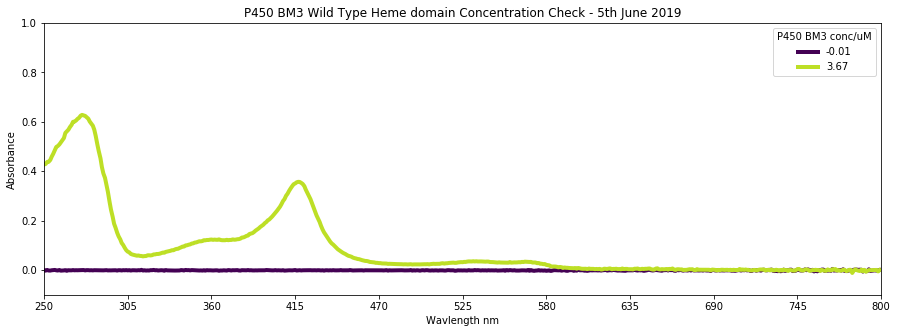

baseline        -0.008476
bm3WT_5in1000    3.667913
Name: Concs, dtype: float64

In [2]:
from ProteinConcCheck import dataset
spec = dataset('20191220_bm3WT_ConcCheck.csv')
spec.plot_traces()
spec.calc_conc()

In [3]:
## total protein vol/plate:
total = 0
for vol in [20,30,40]:
    for repeat in range(8):
        total += vol*16
        
print(total, 'µl')

11520 µl


In [4]:
proteinStockConc = 3.667913/(5/1000)

print('Stock Conc:\t{} µM'.format(proteinStockConc))

def V1(V2,C1,C2):
    return (C2*V2)/C1

# 5 mls of each should do
print('{} µl of stock 15 ml for 10 µM BM3'.format(round(V1(15_000,proteinStockConc,10),2)))
print('{} µl of stock 15 ml for 5 µM BM3'.format(round(V1(15_000,proteinStockConc,5),2)))

Stock Conc:	733.5826 µM
204.48 µl of stock 5 ml for 10 µM BM3
102.24 µl of stock 5 ml for 5 µM BM3


In [1]:
from PlateObjects import SourcePlateCompound, AssayPlate, Block

DMSO = SourcePlateCompound('DMSO',['D'+str(i) for i in range(1,20)],ldv=False)
aracadonic = SourcePlateCompound('Arachadonic acid',['C'+str(i) for i in range(1,10)],ldv=False)

assayplate1 = AssayPlate()
assayplate2 = AssayPlate()
assayplate3 = AssayPlate()
assayplate4 = AssayPlate()

for vol in [20,30,40]:
    for repeat in range(8):
        block1 = Block(aracadonic,DMSO,vol)
        assayplate1.AddBlocks(block1)
        
        block2 = Block(aracadonic,DMSO,vol)
        assayplate2.AddBlocks(block2)
        
        block3 = Block(aracadonic,DMSO,vol)
        assayplate3.AddBlocks(block3)
        
        block4 = Block(aracadonic,DMSO,vol)
        assayplate4.AddBlocks(block4)


assayplate1.MapWells()
assayplate2.MapWells()
assayplate3.MapWells()
assayplate4.MapWells()

transferMap1 = assayplate1.TransferPlan
transferMap2 = assayplate2.TransferPlan
transferMap3 = assayplate3.TransferPlan
transferMap4 = assayplate4.TransferPlan

transferMap1 = transferMap1.loc[transferMap1['Volume']>0]
transferMap2 = transferMap2.loc[transferMap2['Volume']>0]
transferMap3 = transferMap3.loc[transferMap3['Volume']>0]
transferMap4 = transferMap4.loc[transferMap4['Volume']>0]

transferMap1.to_csv('20191220_transferMap1.csv')
transferMap2.to_csv('20191220_transferMap2.csv')
transferMap3.to_csv('20191220_transferMap3.csv')
transferMap4.to_csv('20191220_transferMap4.csv')

I've noticed another problem with my transfer map scripts:

In [22]:
transferMap1 == transferMap4

,SrcWell,Destination Well,Volume
1,True,True,True
3,True,True,True
4,True,True,True
5,True,True,True
6,True,True,True
7,True,True,True
8,True,True,True
9,True,True,True
10,True,True,True
11,True,True,True
